In [72]:
import numpy as np
import sys,os
import matplotlib.pyplot as plt
from scipy.stats import multivariate_t as mvt, norm 
import sklearn
from sklearn.covariance import GraphicalLasso
import scipy
from sklearn.metrics import zero_one_loss
from sklearn.metrics.pairwise import pairwise_kernels
import time
import tqdm
import networkx as nx

sys.path.insert(0, 'C:/Users/User/Code/DyGraph')

import DyGraph as dg

In [91]:
# Read
import pickle
with open(f'../data/large_scale/ls_gaussian2_block-wise-reconstruction_1000_100.pkl', 'rb') as handle:
    bwr = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian2_element-wise_1000_100.pkl', 'rb') as handle:
    ew = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian2_global-reconstruction_1000_100.pkl', 'rb') as handle:
    gr = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian2_perturbed-node_1000_100.pkl', 'rb') as handle:
    pn = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian2_ridge_1000_100.pkl', 'rb') as handle:
    ridge = pickle.load(handle)

In [74]:
ds = [5, 10, 20, 50, 80, 100, 150, 300, 1000]

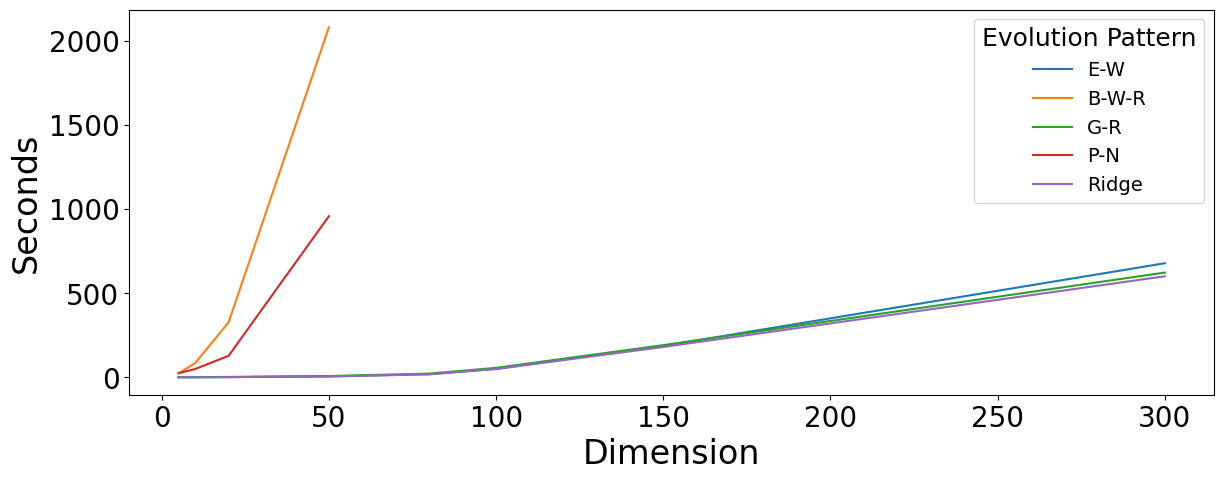

In [109]:
fig, ax = plt.subplots(1,1, figsize = (14,5))

ax.plot(ew['ds'], ew['time_elapsed'], label = "E-W")
ax.plot(bwr['ds'], bwr['time_elapsed'], label = "B-W-R")
ax.plot(gr['ds'], gr['time_elapsed'], label = "G-R")
ax.plot(pn['ds'], pn['time_elapsed'], label = "P-N")
ax.plot(ridge['ds'], ridge['time_elapsed'], label = "Ridge")
legend = ax.legend(title = "Evolution Pattern",fontsize = 14)
legend.get_title().set_fontsize('18')
ax.set_xlabel("Dimension", fontdict = {'fontsize':24})
ax.set_ylabel("Seconds", fontdict = {'fontsize':24})
ax.tick_params(axis='both', which='major', labelsize=20)



In [92]:
ew['time_elapsed']

[1.0118720531463623,
 1.1305031776428223,
 1.6245431900024414,
 5.8453288078308105,
 18.898216009140015,
 50.70661282539368,
 187.2489984035492,
 678.5286686420441]